# Выявление закономерностей, определяющих успешность игры

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр и CERO (Computer Entertainment Rating Organization) — это аналог ESRB для Японии. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

Name — название игры
<br>Platform — платформа
<br>Year_of_Release — год выпуска
<br>Genre — жанр игры
<br>NA_sales — продажи в Северной Америке (миллионы проданных копий)
<br>EU_sales — продажи в Европе (миллионы проданных копий)
<br>JP_sales — продажи в Японии (миллионы проданных копий)
<br>Other_sales — продажи в других странах (миллионы проданных копий)
<br>Critic_Score — оценка критиков (максимум 100)
<br>User_Score — оценка пользователей (максимум 10)
<br>Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


<br><b>Цели исследования</b>:
1. Выявить определяющие успешность игры закономерности
2. Определить актуальный период, на основе которого можно построить прогноз на 2017 год
3. Проанализировать игровой рынок, найти инсайты
4. Найти потенциально прибыльные платформы и жанры
5. Оценить влияние отзывов на продажи игр
5. Составить портрет пользователя для каждого региона
5. Оценить влияние рейтинга ESRB на продажи игр
5. Проверить гипотезы, относительно пользовательских оценок

<br><b>Ход исследования</b>:
1. Обзор и изучение данных
2. Предобработка данных
3. Добавление новых данных в таблицу
4. Исследовательский анализ данных
5. Статистический анализ данных
6. Вывод

## Изучение общей информации о файле 

### Импорт библиотек и изучение данных

In [1]:
import seaborn as sns # импортируем библиотеку seaborn
import matplotlib.pyplot as plt # импортируем из библиотеки 'matplotlib' модуль 'pyplot'
import numpy as np # импортируем библиотеку numpy
import pandas as pd # импортируем библиотеку pandas
import statsmodels.api as sm # импортируем библиотеку statsmodels
from scipy import stats as st # импортируем из библиотеки 'scipy' модуль 'stats'
from scipy.stats import shapiro # импортируем из библиотеки 'scipy' модуль 'shapiro'
from scipy.stats import ttest_ind # импортируем из библиотеки 'scipy' модуль 'ttest_ind'
from pylab import rcParams # импортируем из библиотеки 'pylab' модуль 'rcParams'

rcParams['figure.figsize'] = 5, 3 # изменим дефолтный размер графиков
%config InlineBackend.figure_format = 'svg' # графики в svg выглядят более четкими
plt.style.use('ggplot') # установим стиль графиков из библиотеки matplotlib

# прочитаем csv файл и добавим обработчик ошибок в случае неудачного чтения файла
data = pd.read_csv('games.csv')

pd.set_option('display.max_columns', None) # уберём ограничение на вывод столбцов на экран

In [2]:
display(data.head(15)) # выведем 15 строк таблицы на экран

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info(verbose=True) # изучим общую информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице несколько столбцов с пропусками, также некоторые столбцы имеют некорректный формат, такие как "Year_of_Release" и "User_Score".

## Предобработка данных

### Преобразование типов данных

In [4]:
data.columns = data.columns.str.lower() # приведём названия столбцов к нижнему регистру

In [5]:
# изменим формат в столбце 'year_of_release' на datetime64
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')

In [6]:
# изменим формат в столбце 'user_score' на float64
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [7]:
data.info() # проверим поменялись ли типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


Типы данных в столбцах "year_of_release" и "user_score" изменены на корректные.

### Поиск и обработка пропусков

In [8]:
# создадим таблицу для отображения кол-ва пропущенных строк в столбцах
passes_count = data.isna().sum()[lambda x : x!=0]
# создадим таблицу для отображения % пропусков от общего числа строк
passes_procent = pd.DataFrame(data.isna().mean()[lambda x : x!=0]*100)
passes = pd.concat([passes_count, passes_procent], axis=1) # объединим таблицы 'passes_count' и 'passes_procent'

passes.columns = ['passes_count', 'passes_procent'] # переименуем столбцы в таблице
(passes.sort_values(by='passes_count', ascending=False)
       .style.format({'passes_procent': '{:.1f}%'}).background_gradient('coolwarm')
) # поменяем стиль таблицы

,passes_count,passes_procent
user_score,9125,54.6%
critic_score,8578,51.3%
rating,6766,40.5%
year_of_release,269,1.6%
name,2,0.0%
genre,2,0.0%


Пропуски в столбцах "user_score", "critic_score", "rating" заменить невозможно, так как они относятся к типу MCAR, т.е. абсолютно случайные. Они не зависят от других переменных и не могут быть объяснены.
<br>Пропуски в столбце "year_of_release" оставим как есть.
<br>Пропуски в столбцах "name" и "genre" заменим на значение "Unknown".

In [9]:
data['rating'] = data['rating'].fillna('Unknown') # заполним пропуски в столбце 'rating'
data['name'] = data['name'].fillna('Unknown') # заполним пропуски в столбце 'name'
data['genre'] = data['genre'].fillna('Unknown') # заполним пропуски в столбце 'genre'

Причины, по которым могли появится пропуски в следующих столбцах делятся на 2 типа (1 тип - пользователь не указал данные и 2 тип - технический сбой в системе сбора данных):

* user_score - 1
* critic_score - 1
* rating - 1
* year_of_release - 2
* name - 2
* genre - 2

Пропуски в столбце "user_score" и "critic_score" появились скорее всего из-за того, что игре никто не поставил оценку.
<br>Пропуски в столбце "rating" появились скорее всего из-за того, что рейтинговая комиссия не стала выставлять свой рейтинг. Например, онлайн играм не ставят рейтинг, потому что невозможно предсказать, что вы услышите и увидите в онлайн игре.
<br>Аббревиатура 'tbd' в столбце "user_score" расшифровывается как "To Be Decided" (будет решено), т.е. пользовательская оценка появится позже. Значение 'tbd' было заменено на NaN во время преобразования типа в столбце "user_score" на float64.

<br>Обработка пропусков завершена.

### Поиск и обработка явных и неявных дубликатов

In [10]:
data.duplicated().sum() # поиск явных дубликатов

0

In [11]:
data['platform'].sort_values().unique() # посмотрим уникальные значения по столбцу 'platform'

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [12]:
data['genre'].sort_values().unique() # посмотрим уникальные значения по столбцу 'genre'

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', 'Unknown'], dtype=object)

Явных и неявных дубликатов не выявлено.

### Поиск и обработка аномалий

In [13]:
data.describe() # выведем статистические показатели по данным в таблице на экран

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000
mean,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046
std,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006
min,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Аномалий не выявлено.

## Добавление новых данных в таблицу

### Добавление новых столбцов в таблицу

In [14]:
# добавим столбец 'overall_sales'
data['overall_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

Посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец "overall_sales".

## Исследовательский анализ данных

### Расчёт динамики релизов по годам

In [15]:
# извлечём из столбца 'year_of_release' год и добавим это значение в новый столбец
data['release_year'] = pd.DatetimeIndex(data['year_of_release']).year
# изменим тип данных в столбце 'release_year'
data['release_year'] = data['release_year'].astype('Int64')

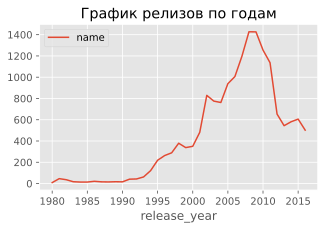

In [16]:
# создадим сводную таблицу по столбцам 'release_year' и 'name' и построим линейный график
(data.pivot_table(index='release_year',values='name', aggfunc='count')
                      .plot(grid=True, title='График релизов по годам')
);

Из графика видно, что пик релизов игр пришёлся на 2008-2009 гг. и составил более 1400 релизов в год.
Данные за все периоды не так важны, так как до 2000 года ежегодных релизов было менее 400 штук.

### Анализ продаж по платформам

In [17]:
# создадим сводную таблицу по столбцам 'platform' и 'overall_sales'
(data.pivot_table(index='platform', values='overall_sales', aggfunc='sum')
                 .sort_values(by='overall_sales', ascending=False)
)

,overall_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Выберем для дальнейшего анализа 3 платформы с наибольшими суммарными продажами и построим распределение по годам.

In [18]:
def pivot_table_platform_hist(data, platform):
    ''' 
    напишем функцию, которая фильтрует по столбцу 'platform'
    и строит гистограмму
    '''
    data = data.query('platform == @platform')
    return plt.show(data['release_year'].plot(kind='hist', subplots=True, 
                                              sharex=True, sharey=True, 
                                              title=f'Релизы игр на {platform} по годам')
                   )

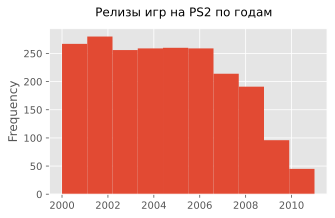

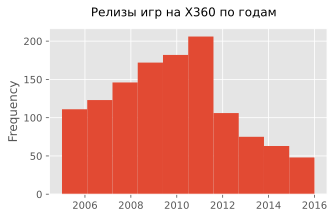

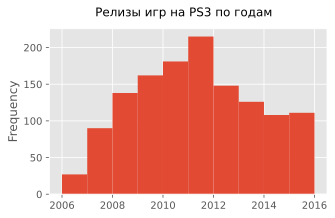

In [19]:
pivot_table_platform_hist(data, 'PS2') # применим функцию 'pivot_table_platform_hist'
pivot_table_platform_hist(data, 'X360') # применим функцию 'pivot_table_platform_hist'
pivot_table_platform_hist(data, 'PS3') # применим функцию 'pivot_table_platform_hist'

По графикам выше видно, что в среднем жизненный цикл платформы равен 10 годам.

### Анализ продаж по самым популярным платформам за актуальный период

Рассмотрим данные с 2013 по 2016 год. В 2013 году вышли PS4 и XOne. В связи с этим событием поменялись стандарты игровой индустрии, появились новые технологии. Этот период будем считать как актуальный.
<br>На основе данных за этот период можно будет сделать прогноз на 2017 год.

In [20]:
# изменим тип данных в столбце 'release_year'
data['release_year'] = data['release_year'].fillna(0).astype('int64')
data['release_year'] = data['release_year'].replace(0, np.nan)

In [21]:
data_actual = data.query('release_year >= 2013') # создадим переменную 'data_actual'

In [22]:
# создадим сводную таблицу по столбцам 'platform' и 'overall_sales'
(data_actual.pivot_table(index='platform', values='overall_sales', aggfunc='sum')
                 .sort_values(by='overall_sales', ascending=False)
)

,overall_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Выберем для дальнейшего анализа 3 популярные платформы с наибольшими суммарными продажами и построим графики.

In [23]:
def pivot_table_platform_plot(data, platform):
    ''' 
    напишем функцию, которая создаёт сводные таблицы с фильтром по столбцу 'platform'
    и строит линейный график
    '''
    return plt.show((pd.pivot_table(data[data.platform == platform], index='release_year',
                                    values='overall_sales', aggfunc='sum')               
                                   .plot(grid=True, title=f'Продажи игр на {platform} по годам'))
                   )

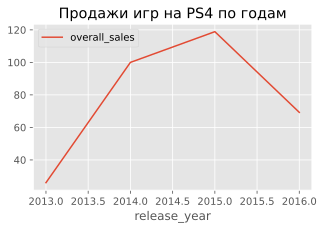

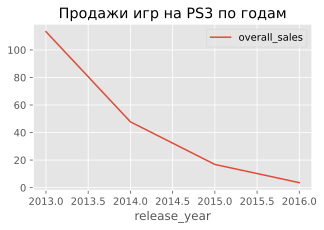

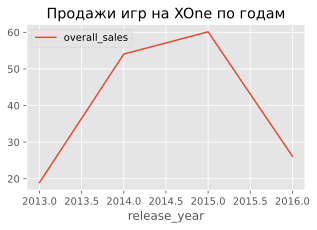

In [24]:
pivot_table_platform_plot(data_actual, 'PS4') # применим функцию 'pivot_table_platform_plot
pivot_table_platform_plot(data_actual, 'PS3') # применим функцию 'pivot_table_platform_plot'
pivot_table_platform_plot(data_actual, 'XOne') # применим функцию 'pivot_table_platform_plot'

По графикам видно, что PS4 и XOne в 2015 году достигли пика продаж игр и начали терять свои позиции, это говорит о том, что в скором времени выйдет новое поколение консолей, а именно Playstation 5 и Xbox Series X.
<br>PS3 в 2011 году достиг пика продаж игр и начал терять свои позиции, а в 2013 году его сменила PS4.

### Расчёт описательной статистики по топ-3 платформам за актуальный период

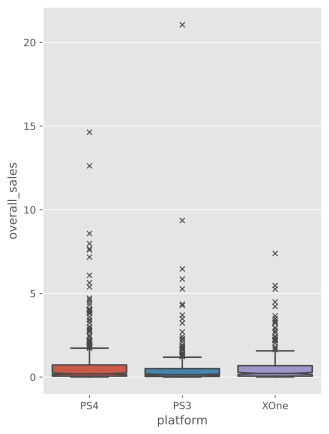

In [25]:
plt.figure(figsize=(5,7)) # зададим размер графика
sns.boxplot(data=data_actual, y='overall_sales',
            x='platform', order=['PS4', 'PS3', 'XOne'],
            flierprops={"marker": "x"},
            notch=True,
           ); # построим boxplot по платформам

Чтобы лучше рассмотреть boxplot избавимся от выбросов. Для этого отфильтруем столбец "overall_sales" до 1,5 млн. копий.

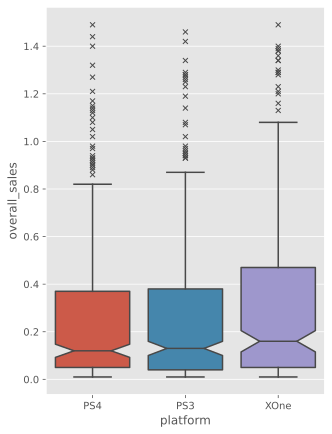

In [26]:
plt.figure(figsize=(5,7)) # зададим размер графика
sns.boxplot(data=data_actual.query('overall_sales < 1.5'), y='overall_sales',
            x='platform', order=['PS4', 'PS3', 'XOne'],
            flierprops={"marker": "x"},
            notch=True,
           ); # построим boxplot по платформам с фильтрацией выбросов

По графику видно, что у всех платформ распределение продаж игр смещено сильно вправо. Также можно отметить большое количество выбросов.

In [27]:
# выведем на экран описательную статистику по платформам
print('Описательная статистика по PS4:', data_actual.query('platform == "PS4"')["overall_sales"].describe(), sep='\n')
print()
print('Описательная статистика по PS3:', data_actual.query('platform == "PS3"')["overall_sales"].describe(), sep='\n')
print()
print('Описательная статистика по XOne:', data_actual.query('platform == "XOne"')["overall_sales"].describe(), sep='\n')

Описательная статистика по PS4:
count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: overall_sales, dtype: float64

Описательная статистика по PS3:
count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: overall_sales, dtype: float64

Описательная статистика по XOne:
count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: overall_sales, dtype: float64


Из описательной статистики видно, что в среднем игры продаются тиражами 801, 526 и 645 тыс. копий на PS4, PS3 и XOne соответственно. Также посмотрим самые продаваемые игры на каждой платформе.

In [28]:
# создадим сводную таблицу по платформе 'PS4'
(pd.pivot_table(data_actual[data_actual.platform == 'PS4'], index='name',
                                    values='overall_sales', aggfunc='sum')
              .sort_values(by='overall_sales', ascending=False)
)

,overall_sales
name,
Call of Duty: Black Ops 3,14.63
Grand Theft Auto V,12.62
FIFA 16,8.58
Star Wars Battlefront (2015),7.98
Call of Duty: Advanced Warfare,7.66
...,...
Prototype: Biohazard Bundle,0.01
Professional Farmer 2016,0.01
Chaos;Child,0.01


In [29]:
# создадим сводную таблицу по платформе 'PS3'
(pd.pivot_table(data_actual[data_actual.platform == 'PS3'], index='name',
                                    values='overall_sales', aggfunc='sum')
              .sort_values(by='overall_sales', ascending=False)
)

,overall_sales
name,
Grand Theft Auto V,21.05
Call of Duty: Ghosts,9.36
FIFA 14,6.46
The Last of Us,5.86
Minecraft,5.27
...,...
Chaos;Child,0.01
Dynasty Warriors: Eiketsuden,0.01
Nitroplus Blasterz: Heroines Infinite Duel,0.01


In [30]:
# создадим сводную таблицу по платформе 'XOne'
(pd.pivot_table(data_actual[data_actual.platform == 'XOne'], index='name',
                                    values='overall_sales', aggfunc='sum')
              .sort_values(by='overall_sales', ascending=False)
)

,overall_sales
name,
Call of Duty: Black Ops 3,7.39
Grand Theft Auto V,5.47
Call of Duty: Advanced Warfare,5.26
Halo 5: Guardians,4.49
Fallout 4,4.22
...,...
Ride 2,0.01
Rocksmith 2014 Edition Remastered,0.01
Rugby Challenge 3,0.01


Видим, что на каждой из 3-х платформ по продажам лидируют серии игр "GTA", "Call of Duty" и "FIFA".

### Определение влияния отзывов на продажи игр на топ-3 платформах за актуальный период

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. В качестве самой популярной платформы выступает PS4.

In [31]:
def data_to_jointplot(data, column, platform):
    '''
    Создадим функцию для построения диаграмм рассеяния по заданному столбцу и столбцу 'overall_sales'
    с фильтром по платформе
    ''' 
    data = data.query('platform == @platform') # отфильтруем таблицу по платформе
    
    ax = sns.jointplot(x='overall_sales', data=data, y=column) # создадим jointplot
    ax.fig.suptitle(f'overall_sales x {column} на {platform}') # создадим заголовок к jointplot
    ax.fig.subplots_adjust(top=0.95) # уменьшим jointplot, чтобы заголовок не перекрывал график

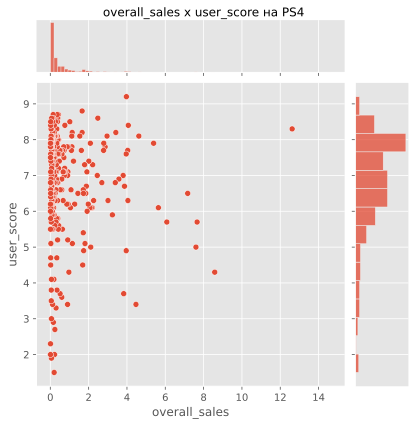

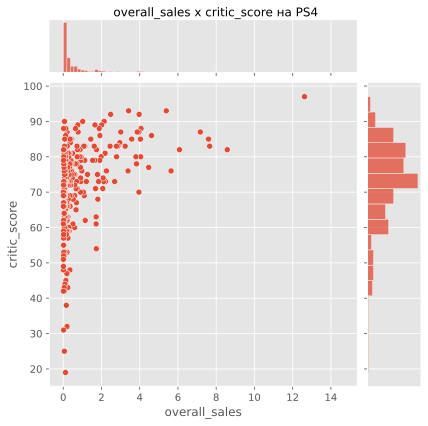

In [32]:
data_to_jointplot(data_actual, 'user_score', 'PS4') # вызовем функцию data_to_jointplot
data_to_jointplot(data_actual, 'critic_score', 'PS4') # вызовем функцию data_to_jointplot

In [33]:
def data_to_corr(data, column, platform):
    '''
    Создадим функцию для расчёта корреляции Пирсона по заданному столбцу и столбцу 'overall_sales'
    с фильтром по платформе
    ''' 
    data = data.query('platform == @platform') # отфильтруем таблицу по платформе
    return print(f'Корелляция "overall_sales" с "{column}": {round(data[column].corr(data["overall_sales"]),3)}')

In [34]:
data_to_corr(data_actual, 'user_score', 'PS4') # вызовем функцию data_to_corr
data_to_corr(data_actual, 'critic_score', 'PS4') # вызовем функцию data_to_corr

Корелляция "overall_sales" с "user_score": -0.032
Корелляция "overall_sales" с "critic_score": 0.407


Таким образом, можно сделать вывод, что пользовательские оценки на PS4 не влияют на продажи игр или эта связь нелинейная.
<br> Между продажами игр на PS4 и отзывами критиков наблюдается средняя положительная связь, т.е. чем выше оценка критиков, тем успешнее продаётся игра.

Посмотрим, как влияют отзывы пользователей и критиков на продажи на платформах PS3 и XOne.

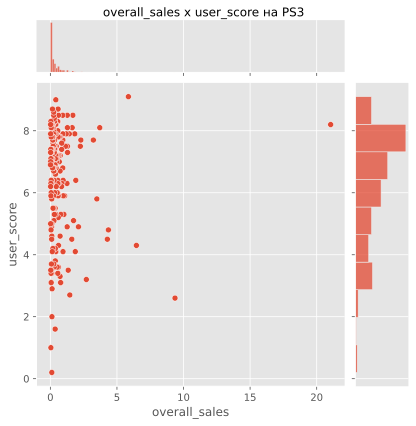

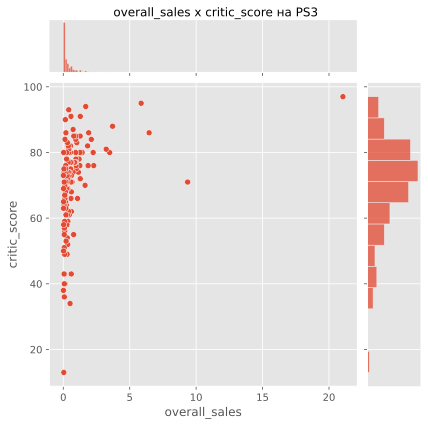

In [35]:
data_to_jointplot(data_actual, 'user_score', 'PS3') # вызовем функцию data_to_jointplot
data_to_jointplot(data_actual, 'critic_score', 'PS3') # вызовем функцию data_to_jointplot

In [36]:
data_to_corr(data_actual, 'user_score', 'PS3') # вызовем функцию data_to_corr
data_to_corr(data_actual, 'critic_score', 'PS3') # вызовем функцию data_to_corr

Корелляция "overall_sales" с "user_score": 0.002
Корелляция "overall_sales" с "critic_score": 0.334


Пользовательские оценки на PS3 не влияют на продажи игр или эта связь нелинейная.
<br> Между продажами игр на PS3 и отзывами критиков наблюдается средняя положительная связь, т.е. чем выше оценка критиков, тем успешнее продаётся игра.

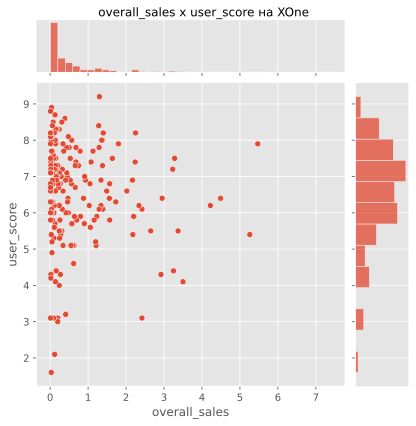

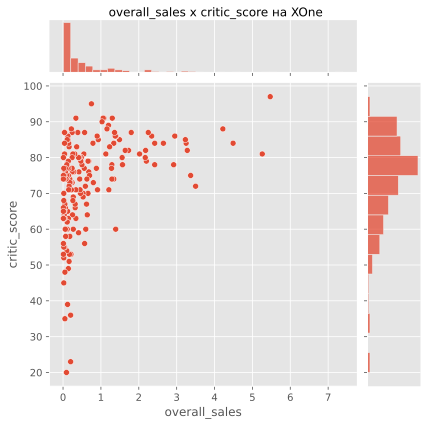

In [37]:
data_to_jointplot(data_actual, 'user_score', 'XOne') # вызовем функцию data_to_jointplot
data_to_jointplot(data_actual, 'critic_score', 'XOne') # вызовем функцию data_to_jointplot

In [38]:
data_to_corr(data_actual, 'user_score', 'XOne') # вызовем функцию data_to_corr
data_to_corr(data_actual, 'critic_score', 'XOne') # вызовем функцию data_to_corr

Корелляция "overall_sales" с "user_score": -0.069
Корелляция "overall_sales" с "critic_score": 0.417


Пользовательские оценки на XOne не влияют на продажи игр или эта связь нелинейная.
<br> Между продажами игр на XOne и отзывами критиков наблюдается средняя положительная связь, т.е. чем выше оценка критиков, тем успешнее продаётся игра.

### Расчёт распределения игр по жанрам за актуальный период

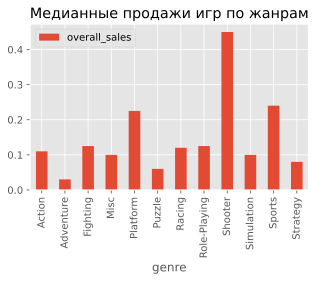

In [39]:
'''
создадим сводную таблицу с агрегированием по жанру,
выведем на экран столбчатую диаграмму и запишем в переменную
'''
data_actual_genre = data_actual.pivot_table(index='genre',values='overall_sales', aggfunc='median')
data_actual_genre.plot(kind='bar', subplots=False, 
                       sharex=True, sharey=True, 
                       title=f'Медианные продажи игр по жанрам'
                      );

Из столбчатой диаграммы выше можно отметить, что наибольшее медианное количество проданных копий в таких жанрах как "Shooter", "Sports", "Platform" и "Role-Playing".
<br>К жанрам с самыми низкими медианными продажами можно отнести "Misc", "Strategy", "Puzzle" и "Adventure".

In [40]:
# посчитаем разницу в медианных продажах между самым популярным и непопулярным жанрах в абсолютных значениях
print('Разница в медианных продажах между "Shooter" и "Adventure":',
      round(data_actual_genre.loc["Shooter"][0] - data_actual_genre.loc["Adventure"][0], 2), 'млн. копий'
     )

Разница в медианных продажах между "Shooter" и "Adventure": 0.42 млн. копий


In [41]:
# посчитаем во сколько раз медианные продажи между самым популярным и непопулярным жанрах отличаются
print('Продажи "Shooter" лучше, чем "Adventure" в',
      round(data_actual_genre.loc["Shooter"][0] / data_actual_genre.loc["Adventure"][0], 0), 'раз.'
     )

Продажи "Shooter" лучше, чем "Adventure" в 15.0 раз.


В итоге можно сделать вывод, что в игровой индустрии с 2013 по 2016 год несколько жанров сильно выделялись на фоне остальных своими большими продажами. Игры в жанрах "Shooter", "Sports", "Platform" и "Role-Playing" продавались сильно лучше, чем другие.

### Портрет пользователя по регионам за актуальный период

#### Анализ самых популярных платформ по регионам за актуальный период

In [42]:
def pivot_table_platform_barplot(data, region_sales, region):
    ''' 
    напишем функцию, которая создаёт сводные таблицы с агрегированием по столбцу 'platform'
    и строит столбчатую диаграмму
    '''
    data = data.pivot_table(index='platform', values=region_sales, aggfunc='sum')
    # заменим абсолютные значения в столбце 'region_sales' на доли от общей суммы
    data[region_sales] = data[region_sales] / data[region_sales].sum() * 100
    return plt.show(data[region_sales].plot(kind='bar', subplots=False,
                                            sharex=True, sharey=True,
                                            title=f'Доли продаж игр в {region} по платформам')
                   )

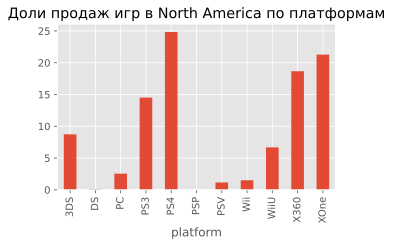

In [43]:
pivot_table_platform_barplot(data_actual, 'na_sales', 'North America') # вызовем функцию 'pivot_table_platform_barplot'

Самые популярные платформы (топ-5) в Северной Америке по количеству продаж игр: PS4, XOne, X360, PS3, 3DS.

In [44]:
def calc_shares_platform(data, region_sales, region, platforms):
    ''' 
    напишем функцию для расчёта доли, которую занимают платформы по продажам игр в определённом регионе
    '''
    # создадим сводную таблицу с агрегированием по столбцу 'platform'
    data = (data.pivot_table(index='platform', values=region_sales, aggfunc='sum')
           .sort_values(by=region_sales, ascending=False)
           )
    print(f'Долю в {round(data.values[0:platforms].sum() / data.sum()[0] * 100, 1)}% занимают топ-{platforms} платформ в регионе {region}.')
    print(f'Самая большая доля у платформы {data.index[0]} с {round(data.values[0][0],1)} млн. проданных игр.')

In [45]:
calc_shares_platform(data_actual, 'na_sales', 'North America', 5) # вызовем функцию calc_shares_platform

Долю в 88.0% занимают топ-5 платформ в регионе North America.
Самая большая доля у платформы PS4 с 108.7 млн. проданных игр.


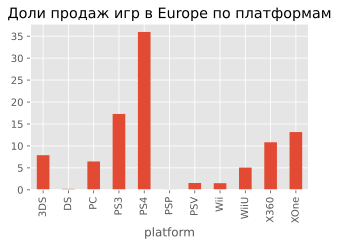

In [46]:
pivot_table_platform_barplot(data_actual, 'eu_sales', 'Europe') # вызовем функцию 'pivot_table_platform_barplot'

Самые популярные платформы (топ-5) в Европе по количеству продаж игр: PS4, PS3, XOne, X360, 3DS.

In [47]:
calc_shares_platform(data_actual, 'eu_sales', 'Europe', 5) # вызовем функцию calc_shares_platform

Долю в 85.1% занимают топ-5 платформ в регионе Europe.
Самая большая доля у платформы PS4 с 141.1 млн. проданных игр.


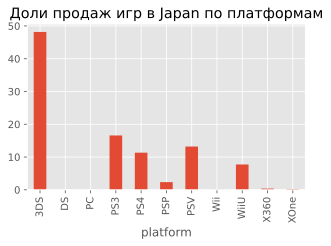

In [48]:
pivot_table_platform_barplot(data_actual, 'jp_sales', 'Japan') # вызовем функцию 'pivot_table_platform_barplot'

Самые популярные платформы (топ-5) в Японии по количеству продаж игр: 3DS, PS3, PSV, PS4, WiiU.

In [49]:
calc_shares_platform(data_actual, 'jp_sales', 'Japan', 5) # вызовем функцию calc_shares_platform

Долю в 97.0% занимают топ-5 платформ в регионе Japan.
Самая большая доля у платформы 3DS с 67.8 млн. проданных игр.


В Северной Америке и Европе доминируют одни и те же консоли. Такие как PS4, XOne, X360, PS3, 3DS, причём в обоих регионах PS4 на 1 месте. 
<br>Ситуация в Японии отличается. Там доминируют 3DS, PS3, PSV, PS4, WiiU, причём на 1 месте 3DS, которая в других регионах не так популярна и находится на 5 месте.
<br>Во всех регионах топ-5 консолей занимают не менее 85% всего рынка продажи игр, что говорит о наличии олигополии на региональных консольных рынках.

#### Анализ самых популярных жанров по регионам за актуальный период

In [50]:
def pivot_table_genre_barplot(data, region_sales, region):
    ''' 
    напишем функцию, которая создаёт сводные таблицы с агрегированием по столбцу 'genre'
    и строит столбчатую диаграмму
    '''
    data = data.pivot_table(index='genre', values=region_sales, aggfunc='sum')
    # заменим абсолютные значения в столбце 'region_sales' на доли от общей суммы
    data[region_sales] = data[region_sales] / data[region_sales].sum() * 100
    return plt.show(data[region_sales].plot(kind='bar', subplots=False,
                                            sharex=True, sharey=True,
                                            title=f'Доли продаж игр в {region} по жанрам')
                   )

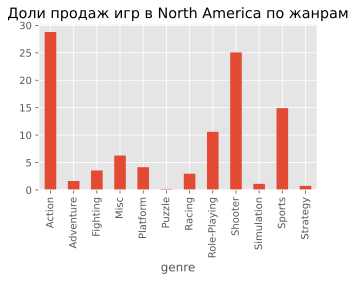

In [51]:
pivot_table_genre_barplot(data_actual, 'na_sales', 'North America') # вызовем функцию 'pivot_table_jenre_barplot'

Самые популярные жанры (топ-5) в Северной Америке по количеству продаж игр: "Action", "Shooter", "Sports", "Role-Playing", "Misc".

In [52]:
def calc_shares_genre(data, region_sales, region, genres):
    '''
    напишем функцию для расчёта доли, которую занимают жанры по продажам игр в определённом регионе
    '''
    # создадим сводную таблицу с агрегированием по столбцу 'genre'
    data = (data.pivot_table(index='genre', values=region_sales, aggfunc='sum')
           .sort_values(by=region_sales, ascending=False)
           )
    print(f'Долю в {round(data.values[0:genres].sum() / data.sum()[0] * 100, 1)}% занимают топ-{genres} жанров в регионе {region}.')
    print(f'Самая большая доля у жанра "{data.index[0]}" с {round(data.values[0][0],1)} млн. проданных игр.')

In [53]:
calc_shares_genre(data_actual, 'na_sales', 'North America', 5) # вызовем функцию calc_shares_genre

Долю в 85.7% занимают топ-5 жанров в регионе North America.
Самая большая доля у жанра "Action" с 126.0 млн. проданных игр.


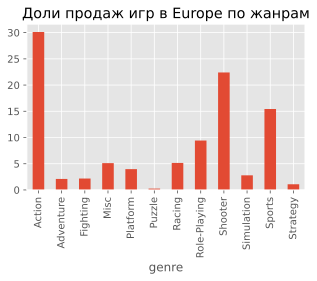

In [54]:
pivot_table_genre_barplot(data_actual, 'eu_sales', 'Europe') # вызовем функцию 'pivot_table_jenre_barplot'

Самые популярные жанры (топ-5) в Европе по количеству продаж игр: "Action", "Shooter", "Sports", "Role-Playing", "Racing".

In [55]:
calc_shares_genre(data_actual, 'eu_sales', 'Europe', 5) # вызовем функцию calc_shares_genre

Долю в 82.5% занимают топ-5 жанров в регионе Europe.
Самая большая доля у жанра "Action" с 118.1 млн. проданных игр.


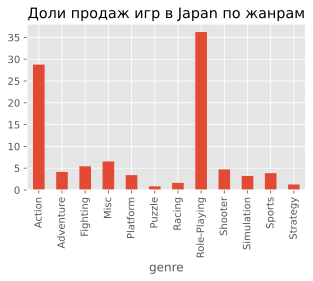

In [56]:
pivot_table_genre_barplot(data_actual, 'jp_sales', 'Japan') # вызовем функцию 'pivot_table_jenre_barplot'

Самые популярные жанры (топ-5) в Японии по количеству продаж игр: "Role-Playing", "Action", "Misc", "Fighting", "Adventure".

In [57]:
calc_shares_genre(data_actual, 'jp_sales', 'Japan', 5) # вызовем функцию calc_shares_genre

Долю в 81.7% занимают топ-5 жанров в регионе Japan.
Самая большая доля у жанра "Role-Playing" с 51.0 млн. проданных игр.


В Северной Америке и Европе в топ-4 входят одни и те же жанры. Такие как "Action", "Shooter", "Sports", "Role-Playing", причём в обоих регионах "Action" на 1 месте.
<br>Ситуация в Японии отличается. Там доминируют "Role-Playing", "Action", "Misc", "Fighting", "Adventure", причём на 1 месте "Role-Playing", которая в других регионах не так популярна и находится на 4 месте.
<br>Во всех регионах топ-5 жанров занимают не менее 81% всего рынка продажи игр, что говорит о высокой концентрации игр определённых жанров.

### Определение влияния рейтинга ESRB на продажи игр по регионам за актуальный период

In [58]:
def pivot_table_rating_barplot(data, region_sales, region):
    ''' 
    напишем функцию, которая создаёт сводные таблицы с агрегированием по столбцу 'rating'
    и строит столбчатую диаграмму
    '''
    data = data.pivot_table(index='rating', values=region_sales, aggfunc='sum')
    # заменим абсолютные значения в столбце 'region_sales' на доли от общей суммы
    data[region_sales] = data[region_sales] / data[region_sales].sum() * 100
    return plt.show(data[region_sales].plot(kind='bar', subplots=False,
                                            sharex=True, sharey=True,
                                            title=f'Доли продаж игр в {region} по рейтингу')
                   )

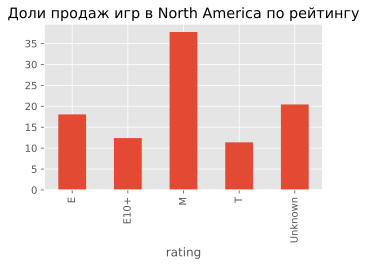

In [59]:
pivot_table_rating_barplot(data_actual, 'na_sales', 'North America') # вызовем функцию 'pivot_table_rating_barplot'

В Северной Америке наибольшую долю по продажам занимают игры с рейтингом "M".

In [60]:
def calc_median_sales_rating(data, region_sales, region):
    ''' 
    напишем функцию для расчёта среднего количества проданных копий игр с различными рейтингами в определённом регионе
    '''
    # создадим сводную таблицу с агрегированием по столбцу 'rating'
    data = (data.pivot_table(index='rating', values=region_sales, aggfunc='median')
               .sort_values(by=region_sales, ascending=False)
           )
    print(f'Медианные продажи игры с самым популярным рейтингом "{data.index[0]}" составляют {round(data.max()[0], 2)} млн. копий в регионе {region}.')

In [61]:
calc_median_sales_rating(data_actual, 'na_sales', 'North America') # вызовем функцию calc_median_sales_rating

Медианные продажи игры с самым популярным рейтингом "M" составляют 0.14 млн. копий в регионе North America.


In [62]:
def calc_shares_sales_rating(data, region_sales, region):
    ''' 
    напишем функцию для расчёта доли, которую занимают игры с различными рейтингами в определённом регионе
    '''
    # создадим сводную таблицу с агрегированием по столбцу 'rating'
    data = (data.pivot_table(index='rating', values=region_sales, aggfunc='sum')
           .sort_values(by=region_sales, ascending=False)
           )
    print(f'Долю в {round(data.values[0].sum() / data.sum()[0] * 100, 1)}% или {round(data.values[0][0],1)} млн. проданных игр занимает самый распространённый рейтинг "{data.index[0]}" в регионе {region}.')

In [63]:
calc_shares_sales_rating(data_actual, 'na_sales', 'North America') # вызовем функцию calc_shares_sales_rating

Долю в 37.7% или 165.2 млн. проданных игр занимает самый распространённый рейтинг "M" в регионе North America.


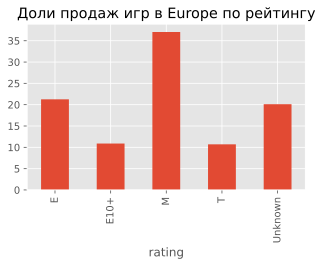

In [64]:
pivot_table_rating_barplot(data_actual, 'eu_sales', 'Europe') # вызовем функцию 'pivot_table_rating_barplot'

В Европе наибольшую долю по продажам занимают игры с рейтингом "M".

In [65]:
calc_median_sales_rating(data_actual, 'eu_sales', 'Europe') # вызовем функцию calc_median_sales_rating

Медианные продажи игры с самым популярным рейтингом "M" составляют 0.13 млн. копий в регионе Europe.


In [66]:
calc_shares_sales_rating(data_actual, 'eu_sales', 'Europe') # вызовем функцию calc_shares_sales_rating

Долю в 37.0% или 145.3 млн. проданных игр занимает самый распространённый рейтинг "M" в регионе Europe.


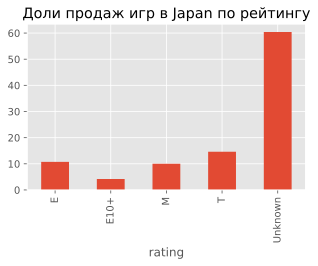

In [67]:
pivot_table_rating_barplot(data_actual, 'jp_sales', 'Japan') # вызовем функцию 'pivot_table_rating_barplot'

В Японии наибольшую долю по продажам занимают игры с рейтингом "T".

In [68]:
calc_median_sales_rating(data_actual, 'jp_sales', 'Japan') # вызовем функцию calc_median_sales_rating

Медианные продажи игры с самым популярным рейтингом "Unknown" составляют 0.02 млн. копий в регионе Japan.


In [69]:
calc_shares_sales_rating(data_actual, 'jp_sales', 'Japan') # вызовем функцию calc_shares_sales_rating

Долю в 60.4% или 85.0 млн. проданных игр занимает самый распространённый рейтинг "Unknown" в регионе Japan.


Можно сделать вывод, что рейтинг ESRB влияет на продажи игр, так как по графикам выше видно, что в каждом регионе есть рейтинг с довольно большой долей продаж игр по сравнению с другими. Всех лучше продаются игры с рейтингом "M" в Северной Америке и Европе, но в Японии возрастными рейтингами для игр занимается CERO, поэтому рейтинг ESRB не влияет на продажи игр в этом регионе.

## Статистический анализ данных

### Проверка на нормальность 1-ой гипотезы

Зададим основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Пользовательские оценки на платформах Xbox One и PC за актуальный период распределены нормально}\\
   H_1 :\text{Пользовательские оценки на платформах Xbox One и PC за актуальный период не распределены нормально}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$
<br>Посчитаем p-value, используя метод "shapiro из библиотеки "scipy" для сравнения средних двух выборок.
<br>Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

#### Графические тесты
**Гистограмма**

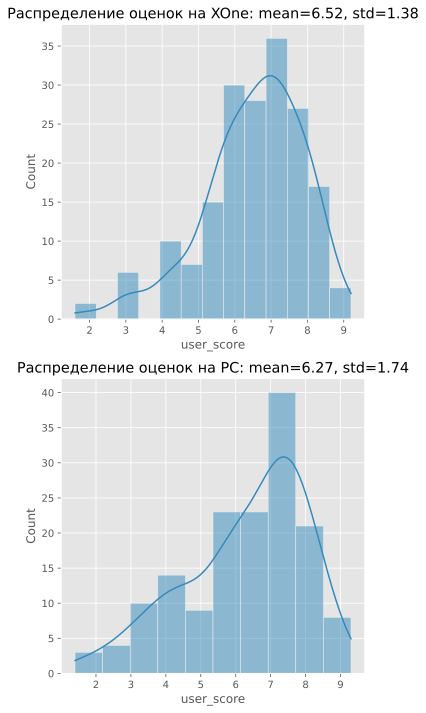

In [70]:
fig1, ax1 = plt.subplots(nrows=2, ncols=1, figsize=(5,10)) # настроим отображение гистограмм

data_actual_xone_user_score = data_actual.query('platform == "XOne"')['user_score'] # отфильтруем таблицу 'data_actual' по платформе
data_actual_pc_user_score = data_actual.query('platform == "PC"')['user_score'] # отфильтруем таблицу 'data_actual' по платформе

# запишем значение средних в столбце 'user_score' из таблицы 'data_actual' в переменные
mean0, mean1 = np.mean(data_actual_xone_user_score), np.mean(data_actual_pc_user_score)
# запишем значение стандартных отклонений в столбце 'user_score' из таблицы 'data_actual' в переменные
std0, std1 = np.std(data_actual_xone_user_score), np.std(data_actual_pc_user_score)

ax1[0].set_title(f'Распределение оценок на XOne: mean={mean0:.2f}, std={std0:.2f}') # создадим заголовок для гистограммы
sns.histplot(data_actual_xone_user_score, kde=True, ax = ax1[0]) # построим гистограмму

ax1[1].set_title(f'Распределение оценок на PC: mean={mean1:.2f}, std={std1:.2f}') # создадим заголовок для гистограммы
sns.histplot(data_actual_pc_user_score, kde=True, ax = ax1[1]) # построим гистограмму

fig1.tight_layout() # установим отступы между графиками

**Boxplot**
<br>Часто boxplot позволяет сделать более точное предположение относительно нормальности распределения, потому что на нём более четко прослеживаются основные свойства.

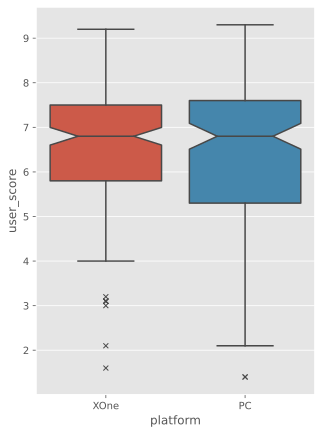

In [71]:
plt.figure(figsize=(5,7)) # зададим размер графика
sns.boxplot(data=data_actual, y='user_score',
            x='platform', order=['XOne', 'PC'], 
            flierprops={"marker": "x"},
            notch=True
           ); # построим boxplot по платформам

**Стандартизация**
<br>Стандартизация приводит все исходные значения выборки (или популяции), независимо от изначального распределения, к набору значений из распределения с нулевым средним и стандартным отклонением, равным 1.
<br>Для этого надо их каждого значения выборки (или популяции) вычесть среднее и разделить полученное значение на стандартное отклонение.

In [72]:
# проведём стандартизацию и запишем результат в переменную
data_actual_xone_user_score_standart = ((data_actual_xone_user_score - np.mean(data_actual_xone_user_score)) /
                                        np.std(data_actual_xone_user_score))
data_actual_pc_user_score_standart = ((data_actual_pc_user_score - np.mean(data_actual_pc_user_score)) /
                                        np.std(data_actual_pc_user_score))

In [73]:
# проверим параметры после стандартизации
print(f'Средние пользовательские оценки на XOne {round(np.mean(data_actual_xone_user_score_standart),1)} и стандартное отклонение {round(np.std(data_actual_xone_user_score_standart), 1)}')
print(f'Средние пользовательские оценки на PC {round(np.mean(data_actual_pc_user_score_standart),1)} и стандартное отклонение {round(np.std(data_actual_pc_user_score_standart), 1)}')

Средние пользовательские оценки на XOne 0.0 и стандартное отклонение 1.0
Средние пользовательские оценки на PC 0.0 и стандартное отклонение 1.0


**Q-Q Plot**
<br>Изображение квантилей данных относительно квантилей нормального распределения позволяет увидеть, каким образом наши измеренные данные соотносятся с теоретическим распределением. Подобные графики называются квантильными графиками, или диаграммами квантиль-квантиль, графиками Q-Q, от англ. Q-Q plot. Они предоставляют быстрый и интуитивно понятный способ определить степень нормальности статистического распределения. Для данных, которые близки к нормальному распределению, квантильный график покажет прямую линию. Отклонения от прямой линии показывают, каким образом данные отклоняются от идеализированного нормального распределения.

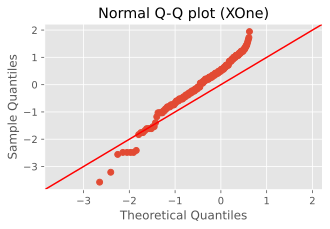

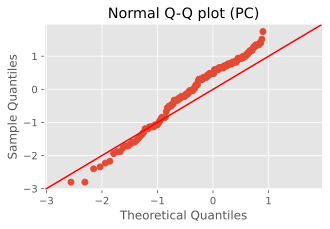

In [74]:
sm.qqplot(data_actual_xone_user_score_standart, line='45') # построим Q-Q Plot
plt.title('Normal Q-Q plot (XOne)')
sm.qqplot(data_actual_pc_user_score_standart, line='45') # построим Q-Q Plot
plt.title('Normal Q-Q plot (PC)')
plt.show()

По результатам графических тестов можно сделать вывод, что распределение пользовательских оценок на Xbox One и PC близки к нормальному.

#### Статистические тесты
**Тест Шапиро-Уилка**
<br>Считается одним из основных и самых популярных тестов для проверки данных на нормальность. Метод возвращает значение тестовой статистики и pvalue. Если значение pvalue меньше заданного уровня значимости, то у нас есть достаточные основания отвергнуть нулевую гипотезу о том, что наша выборка пришла из нормального распределения.

In [75]:
# отфильтруем таблицу 'data_actual' по платформе и сгруппируем по играм
data_groupby_xone_user_score = data_actual.query('platform == "XOne"').groupby('name').agg({'user_score': 'sum'})

In [76]:
# отфильтруем таблицу 'data_actual' по платформе и сгруппируем по играм
data_groupby_pc_user_score = data_actual.query('platform == "PC"').groupby('name').agg({'user_score': 'sum'})

In [77]:
print(f'Тест Шапиро-Уилка по платформе XOne: {shapiro(data_groupby_xone_user_score)}') # проведём тест Шапиро-Уилка
print(f'Тест Шапиро-Уилка по платформе PC: {shapiro(data_groupby_pc_user_score)}') # проведём тест Шапиро-Уилка

Тест Шапиро-Уилка по платформе XOne: ShapiroResult(statistic=0.8119608163833618, pvalue=1.396361739166194e-16)
Тест Шапиро-Уилка по платформе PC: ShapiroResult(statistic=0.8595890998840332, pvalue=3.2938252819691982e-12)


В результате теста Шапиро-Уилка можно утверждать, что распределение пользовательских оценок на Xbox One и PC нормальное.

### Проверка 1-ой гипотезы

Основная и альтернативная гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские оценки на платформах Xbox One и PC за актуальный период одинаковые}\\
   H_1 :\text{Средние пользовательские оценки на платформах Xbox One и PC за актуальный период отличаются}
 \end{cases}
\end{equation*}$

***Критерий Стьюдента (t-тест)***
<br>Критерий Стьюдента (t-тест) - это статистический метод, который позволяет сравнивать средние значения двух выборок и на основе результатов теста делать заключение о том, различаются ли они друг от друга статистически или нет. 

Уровень значимости: $\alpha = 0.05$
<br>Посчитаем p-value, используя метод "ttest" из библиотеки "scipy" для сравнения средних двух выборок.
<br>Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [78]:
results = st.ttest_ind(
    data_groupby_xone_user_score,
    data_groupby_pc_user_score, equal_var=False) # вызовем метод для проверки гипотезы

alpha = 0.05 # зададим значение уровня значимости

print(results.pvalue) # выведем значения p-value на экран 
if results.pvalue < alpha: # напишем условный оператор с выводом строки с ответом
    print(f'{results.pvalue} Отвергаем нулевую гипотезу')
else:
    print(f'{results.pvalue} Не получилось отвергуть нулевую гипотезу')

[0.24401]
[0.24401] Не получилось отвергуть нулевую гипотезу


Таким образом, гипотезу о том, что средние пользовательские оценки на платформах Xbox One и PC за актуальный период одинаковые отвергнуть нельзя.

### Проверка на нормальность 2-ой гипотезы

Зададим основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Пользовательские оценки в жанрах "Action" и "Sports" за актуальный период распределены нормально}\\
   H_1 :\text{Пользовательские оценки в жанрах "Action" и "Sports" за актуальный период не распределены нормально}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$
<br>Посчитаем p-value, используя метод "shapiro из библиотеки "scipy" для сравнения средних двух выборок.
<br>Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

#### Графические тесты
**Гистограмма**

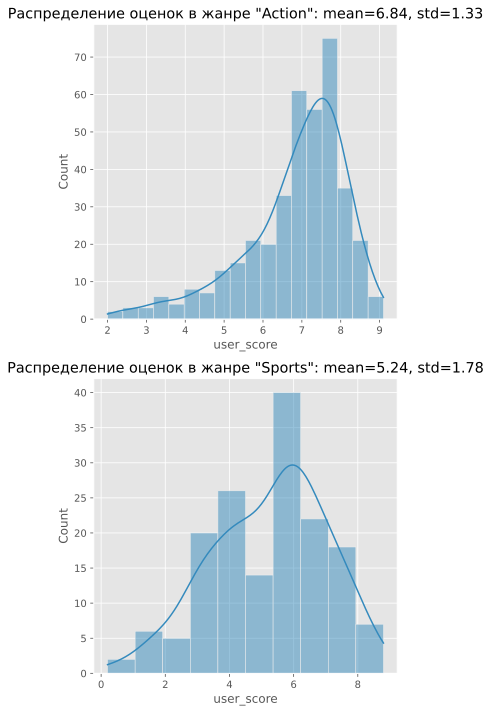

In [79]:
fig1, ax1 = plt.subplots(nrows=2, ncols=1, figsize=(5,10)) # настроим отображение гистограмм

data_actual_action_user_score = data_actual.query('genre == "Action"')['user_score'] # отфильтруем таблицу 'data_actual' по жанрам
data_actual_sports_user_score = data_actual.query('genre == "Sports"')['user_score'] # отфильтруем таблицу 'data_actual' по жанрам

# запишем значение средних в столбце 'user_score' из таблицы 'data_actual' в переменные
mean0, mean1 = np.mean(data_actual_action_user_score), np.mean(data_actual_sports_user_score)
# запишем значение стандартных отклонений в столбце 'user_score' из таблицы 'data_actual' в переменные
std0, std1 = np.std(data_actual_action_user_score), np.std(data_actual_sports_user_score)

ax1[0].set_title(f'Распределение оценок в жанре "Action": mean={mean0:.2f}, std={std0:.2f}') # создадим заголовок для гистограммы
sns.histplot(data_actual_action_user_score, kde=True, ax = ax1[0]) # построим гистограмму

ax1[1].set_title(f'Распределение оценок в жанре "Sports": mean={mean1:.2f}, std={std1:.2f}') # создадим заголовок для гистограммы
sns.histplot(data_actual_sports_user_score, kde=True, ax = ax1[1]) # построим гистограмму

fig1.tight_layout() # установим отступы между графиками

**Boxplot**

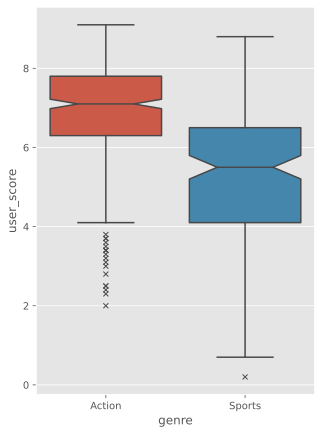

In [80]:
plt.figure(figsize=(5,7)) # зададим размер графика
sns.boxplot(data=data_actual, y='user_score',
            x='genre', order=['Action', 'Sports'], 
            flierprops={"marker": "x"},
            notch=True
           ); # построим boxplot по жанрам

**Стандартизация**

In [81]:
# проведём стандартизацию и запишем результат в переменную
data_actual_action_user_score_standart = ((data_actual_action_user_score - np.mean(data_actual_action_user_score)) /
                                        np.std(data_actual_action_user_score))
data_actual_sports_user_score_standart = ((data_actual_sports_user_score - np.mean(data_actual_sports_user_score)) /
                                        np.std(data_actual_sports_user_score))

In [82]:
# проверим параметры после стандартизации
print(f'Средние пользовательские оценки в жанре "Action" {round(np.mean(data_actual_action_user_score_standart),1)} и стандартное отклонение {round(np.std(data_actual_action_user_score_standart), 1)}')
print(f'Средние пользовательские оценки в жанре "Sports" {round(np.mean(data_actual_sports_user_score_standart),1)} и стандартное отклонение {round(np.std(data_actual_sports_user_score_standart), 1)}')

Средние пользовательские оценки в жанре "Action" -0.0 и стандартное отклонение 1.0
Средние пользовательские оценки в жанре "Sports" 0.0 и стандартное отклонение 1.0


**Q-Q Plot**

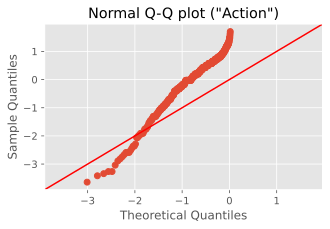

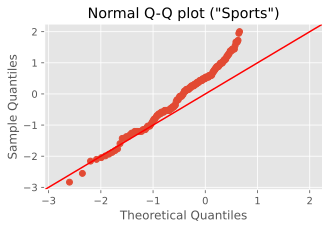

In [83]:
sm.qqplot(data_actual_action_user_score_standart, line='45') # построим Q-Q Plot
plt.title('Normal Q-Q plot ("Action")')
sm.qqplot(data_actual_sports_user_score_standart, line='45') # построим Q-Q Plot
plt.title('Normal Q-Q plot ("Sports")')
plt.show()

По результатам графических тестов можно сделать вывод, что распределение пользовательских оценок в жанрах "Action" и "Sports" близки к нормальному.

#### Статистические тесты
**Тест Шапиро-Уилка**

In [84]:
# отфильтруем таблицу 'data_actual' по жанру и сгруппируем по играм
data_groupby_action_user_score = data_actual.query('genre == "Action"').groupby('name').agg({'user_score': 'sum'})

In [85]:
# отфильтруем таблицу 'data_actual' по жанру и сгруппируем по играм
data_groupby_sports_user_score = data_actual.query('genre == "Sports"').groupby('name').agg({'user_score': 'sum'})

In [86]:
print(f'Тест Шапиро-Уилка по жанру "Action": {shapiro(data_groupby_action_user_score)}') # проведём тест Шапиро-Уилка
print(f'Тест Шапиро-Уилка по жанру "Sports": {shapiro(data_groupby_sports_user_score)}') # проведём тест Шапиро-Уилка

Тест Шапиро-Уилка по жанру "Action": ShapiroResult(statistic=0.6691372394561768, pvalue=3.003546874321187e-27)
Тест Шапиро-Уилка по жанру "Sports": ShapiroResult(statistic=0.9140679240226746, pvalue=8.527991303708404e-05)


В результате теста Шапиро-Уилка можно утверждать, что распределение пользовательских оценок в жанрах "Action" и "Sports" нормальное.

### Проверка 2-ой гипотезы

Основная и альтернативная гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские оценки в жанрах "Action" и "Sports" за актуальный период одинаковые}\\
   H_1 :\text{Средние пользовательские оценки в жанрах "Action" и "Sports" за актуальный период отличаются}
 \end{cases}
\end{equation*}$

***Критерий Стьюдента (t-тест)***
<br>Уровень значимости: $\alpha = 0.05$
<br>Посчитаем p-value, используя метод "ttest" из библиотеки "scipy" для сравнения средних двух выборок.
<br>Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [87]:
results = st.ttest_ind(
    data_groupby_action_user_score,
    data_groupby_sports_user_score, equal_var=False) # вызовем метод для проверки гипотезы

alpha = 0.05 # зададим значение уровня значимости

print(results.pvalue) # выведем значения p-value на экран 
if results.pvalue < alpha: # напишем условный оператор с выводом строки с ответом
    print(f'{results.pvalue} Отвергаем нулевую гипотезу')
else:
    print(f'{results.pvalue} Не получилось отвергуть нулевую гипотезу')

[0.00041276]
[0.00041276] Отвергаем нулевую гипотезу


Таким образом, гипотезу о том, что средние пользовательские оценки в жанрах "Action" и "Sports" за актуальный период одинаковые отвергаем, и можем предположить, что они разные.

## Вывод

Было проведено исследование игрового рынка за несколько лет с целью выявления закономерностей, определяющих успешность игры.
<br>Заказчик — интернет-магазин "Стримчик". 
<br>Входные данные от компании — таблица с продажами игр в различных регионах по платформам и жанрам.
<br>В итоге были выявлены следующие проблемы в данных: пропуски, неверные типы данных. Пропуски были заменены, неверные типы данных исправлены на корректные.
<br>При дальнейшей работе с данными заказчику стоит проводить предобработку данных, т.е. выявлять и устранять или предотвращать пропуски и неверные типы данных.
<br>Кроме того, были добавлены новые столбцы, например, суммарных продажи по всем регионах для проведения дополнительного анализа данных.

<br>В качестве особенностей и зависимостей, которые существуют на игровом рынке, можно выделить следующие:
1. Пик релиза игр пришёлся на 2008-2009 гг. и составил более 1400 релизов в год
2. В среднем жизненный цикл платформы равен 10 годам
3. PS4 и XOne в 2015 году достигли пика продаж игр и начали терять свои позиции, это говорит о том, что в скором времени выйдет новое поколение консолей, а именно Playstation 5 и Xbox Series X
4. В среднем игры продаются тиражами 801, 526 и 645 тыс. копий на PS4, PS3 и XOne соответственно
5. На самых популярных платформах PS4, PS3, XOne пользовательские оценки не влияют на продажи игр
6. Игры в жанрах "Shooter", "Sports", "Platform" и "Role-Playing" продаются сильно лучше, чем другие
7. На успешность игры сильно влияет рейтинг ESRB. В Северной Америке и Европе популярны игры с рейтингом "M". Но в Японии рейтинг играм устанавливает CERO вместо ESRB, поэтому рейтинг ESRB не влияет на продажи игр в этом регионе

<br>Проведён анализ в результате которого были сформулированы следующие выводы:
1. Регионы Северная Америка и Европа похожи по таким критериям как популярность платформ и жанров. Япония, в свою очередь, несколько отличается от них. Это стоит учитывать при выборе региона для продажи игры.
2. Самая популярная платформа в Северной Америке и Европе это PlayStation 4, в Японии - 3DS
3. Отзывы критиков сильно влияют на успешность игры, так что стоит продавать игры с более высокими отзывами
4. В Северной Америке и Европе самый популярный жанр это "Action", в Японии - "Role-Playing"
5. При прогнозировании продаж игр стоит учитывать регион, платформу, жанр, отзывы критиков и рейтинг ESRB

<br>Результаты проверки поставленных гипотез:
1. Гипотезу о том, что средние пользовательские оценки на платформах Xbox One и PC за актуальный период одинаковые отвергнуть нельзя
2. Гипотезу о том, что средние пользовательские оценки в жанрах "Action" и "Sports" за актуальный период одинаковые отвергаем, и можем предположить, что они разные